# Aula 03 - Resolução dos Exercícios

## Novas perguntas do CEO para vocês

1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.


3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.


4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.


5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos 
imóveis, a partir do ano de 1930.


6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos 
imóveis.


7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )


8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )


9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )


10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 



# Resolução

## Import Libraries

In [3]:
import numpy  as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import plotly.express as px

In [4]:
# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## Loading Data

In [5]:
# loading data into memory
#data = pd.read_csv( 'C:/Users/daniel.azevedo/repos/curso_python_zero_ao_ds/datasets/kc_house_data.csv' )
data = pd.read_csv( '/home/daniel/repos/curso_python_zero_ao_ds/datasets/kc_house_data.csv' )
# Garantir que o formato date é um datetime 
data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## 1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [8]:
#Modo 1
#data.loc[data['bedrooms'] == 1, 'dormitory_type'] = 'studio'

In [9]:
#Modo 2
data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartament' if x == 2 else 'house')

## 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

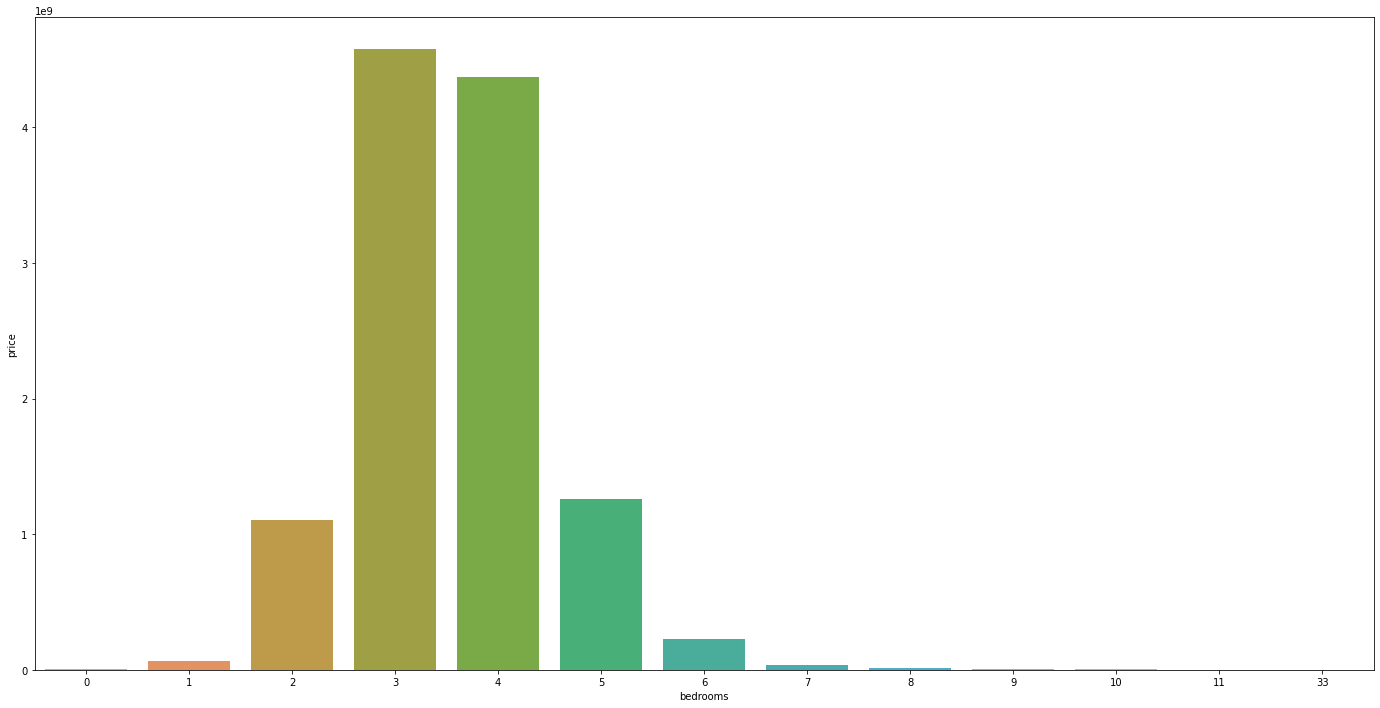

In [10]:
plt.figure(figsize=(24,12))
df = data[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
sns.barplot(x='bedrooms', y='price', data = df)

In [11]:
data[['bedrooms', 'price']].head()

,bedrooms,price
0,3,221900.00
1,3,538000.00
2,2,180000.00
3,4,604000.00
4,3,510000.00


## 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [12]:
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()

<AxesSubplot:xlabel='yr_built', ylabel='price'>

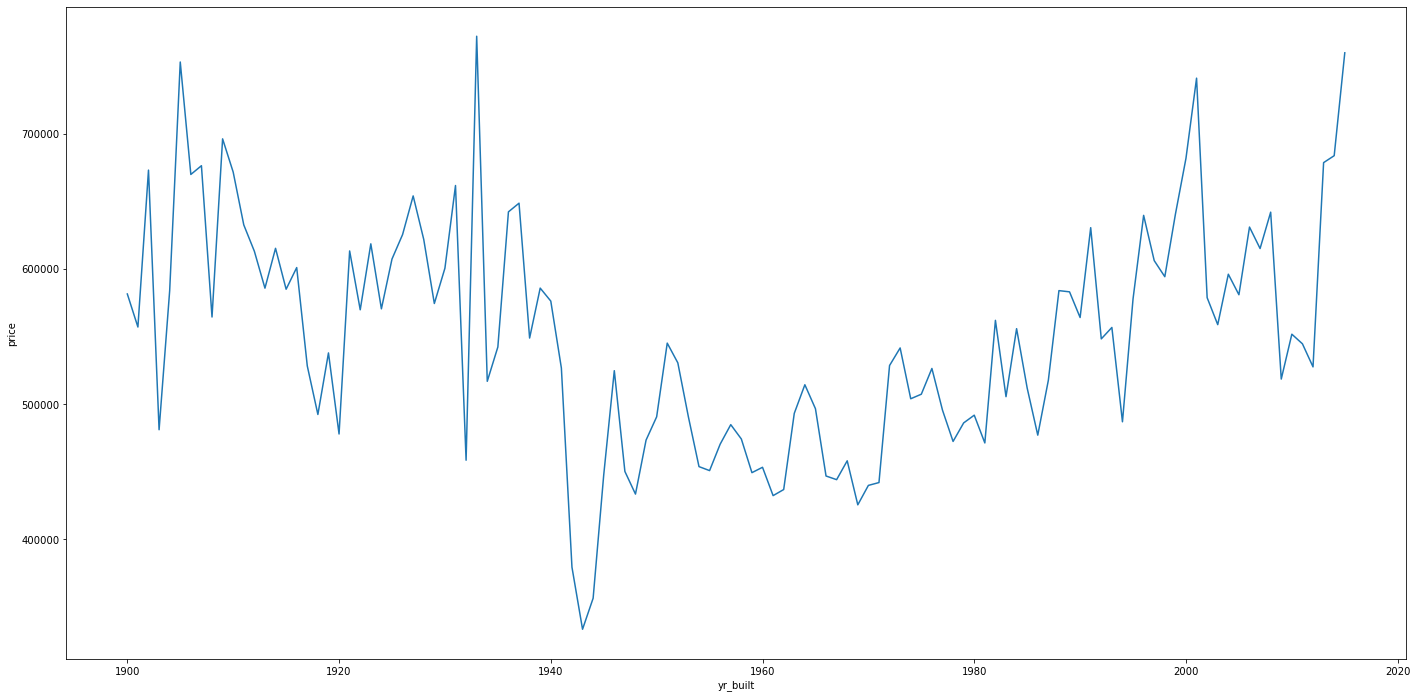

In [13]:
plt.figure(figsize=(24,12))
sns.lineplot(x='yr_built', y='price', data = df)

## 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

In [14]:
df = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

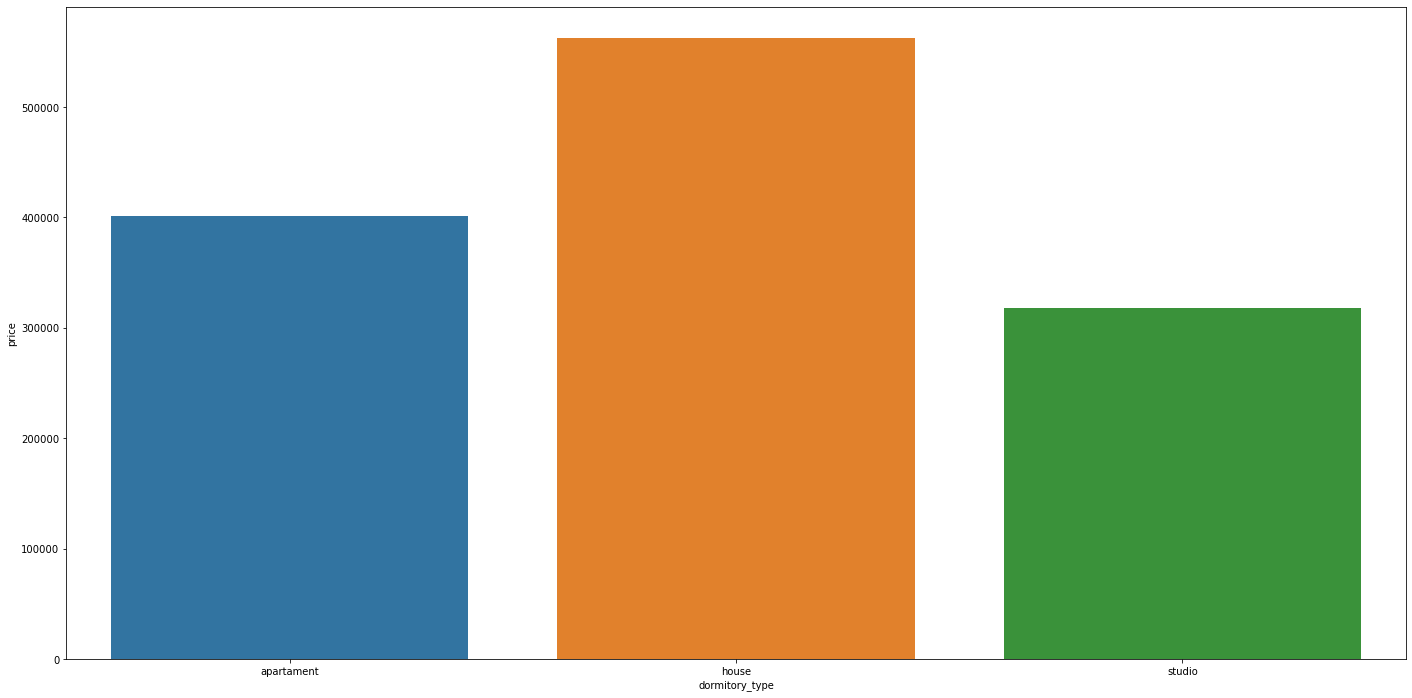

In [15]:
plt.figure(figsize=(24,12))
sns.barplot(x='dormitory_type', y='price', data = df)

## 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.


In [16]:
df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
df.head()

,yr_renovated,price
0,1934,459950.00
1,1940,378400.00
2,1944,521000.00
3,1945,398666.67
4,1946,351137.50


In [17]:
df.sort_values(by='yr_renovated')

,yr_renovated,price
0,1934,459950.00
1,1940,378400.00
2,1944,521000.00
3,1945,398666.67
4,1946,351137.50
...,...,...
64,2011,607496.15
65,2012,625181.82
66,2013,664663.51
67,2014,654756.25


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

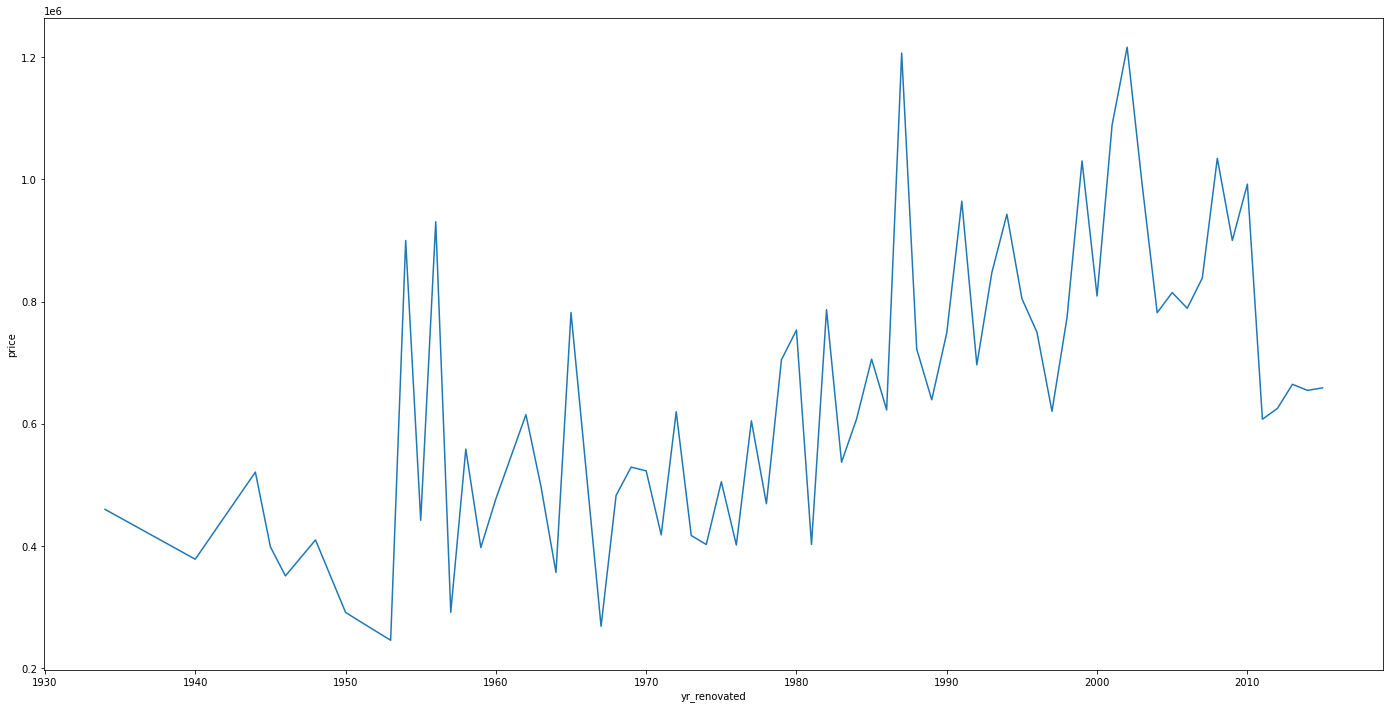

In [18]:
plt.figure(figsize = (24,12))
sns.lineplot(x='yr_renovated', y='price', data=df)

## 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [19]:
df = data[['price','dormitory_type', 'yr_built']].groupby(['yr_built','dormitory_type']).mean().reset_index()
df.head()

,yr_built,dormitory_type,price
0,1900,apartament,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartament,452856.40
4,1901,house,578619.17


## 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

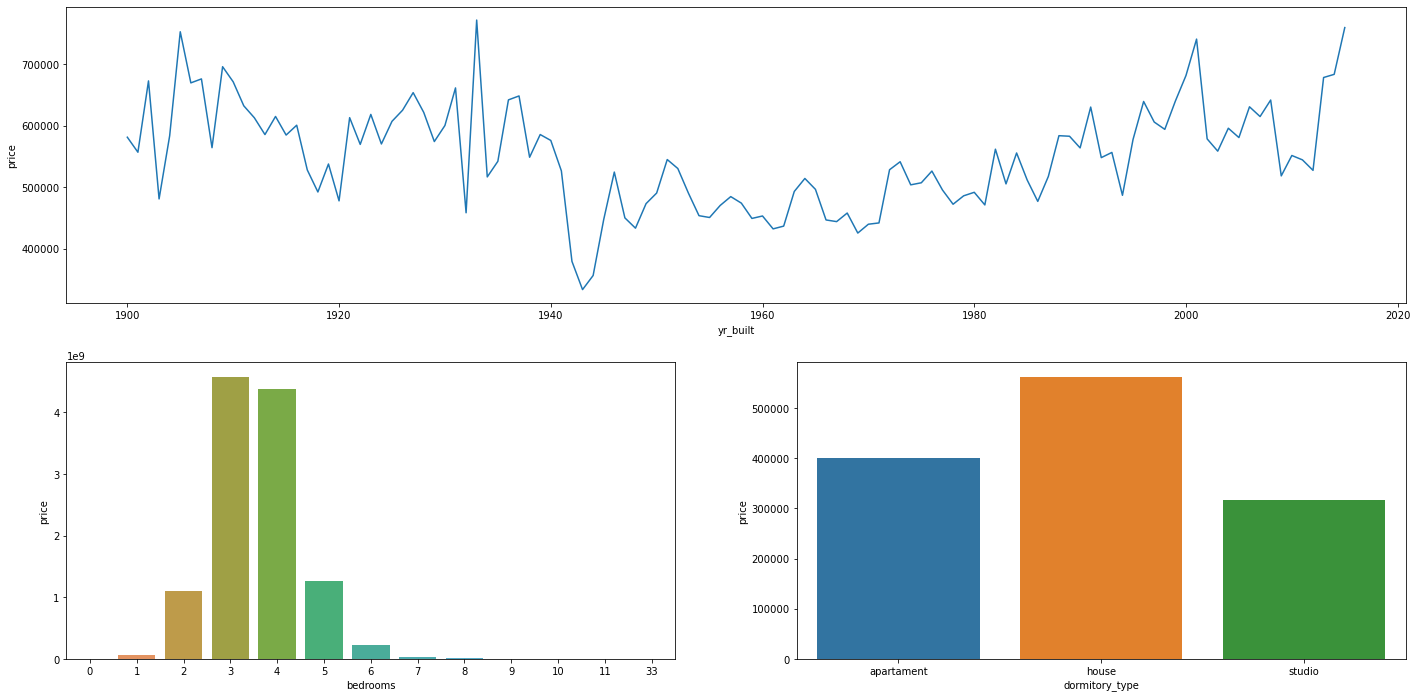

In [20]:
from matplotlib import gridspec

fig = plt.figure(figsize=(24, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure = fig)

ax1 = fig.add_subplot(specs[0, :])# primeira linha e as duas colunas
ax2 = fig.add_subplot(specs[1, 0])# segunda linha e a primeira coluna
ax3 = fig.add_subplot(specs[1, 1])# segunda linha e a segunda coluna


#Questão 2
df = data[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
sns.barplot(ax=ax2, x='bedrooms', y='price', data = df)

#Questão 3
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(ax=ax1, x='yr_built', y='price', data = df)

#Questão 4
df = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(ax=ax3, x='dormitory_type', y='price', data = df)

## 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

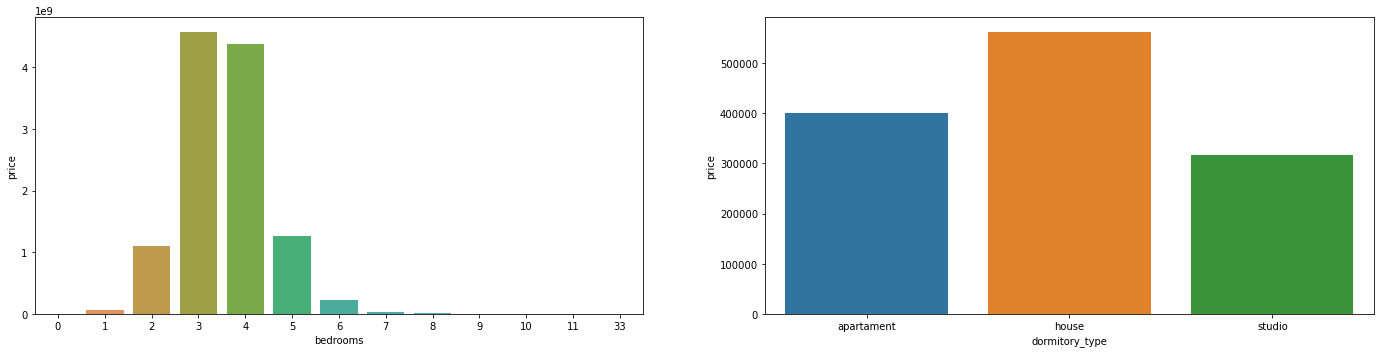

In [21]:
fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])

#First graph
df = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()
sns.barplot(ax=ax1, x='bedrooms', y='price', data=df)

#Second Graph
df = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
sns.barplot(ax=ax2, x='dormitory_type', y='price', data=df)

## 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

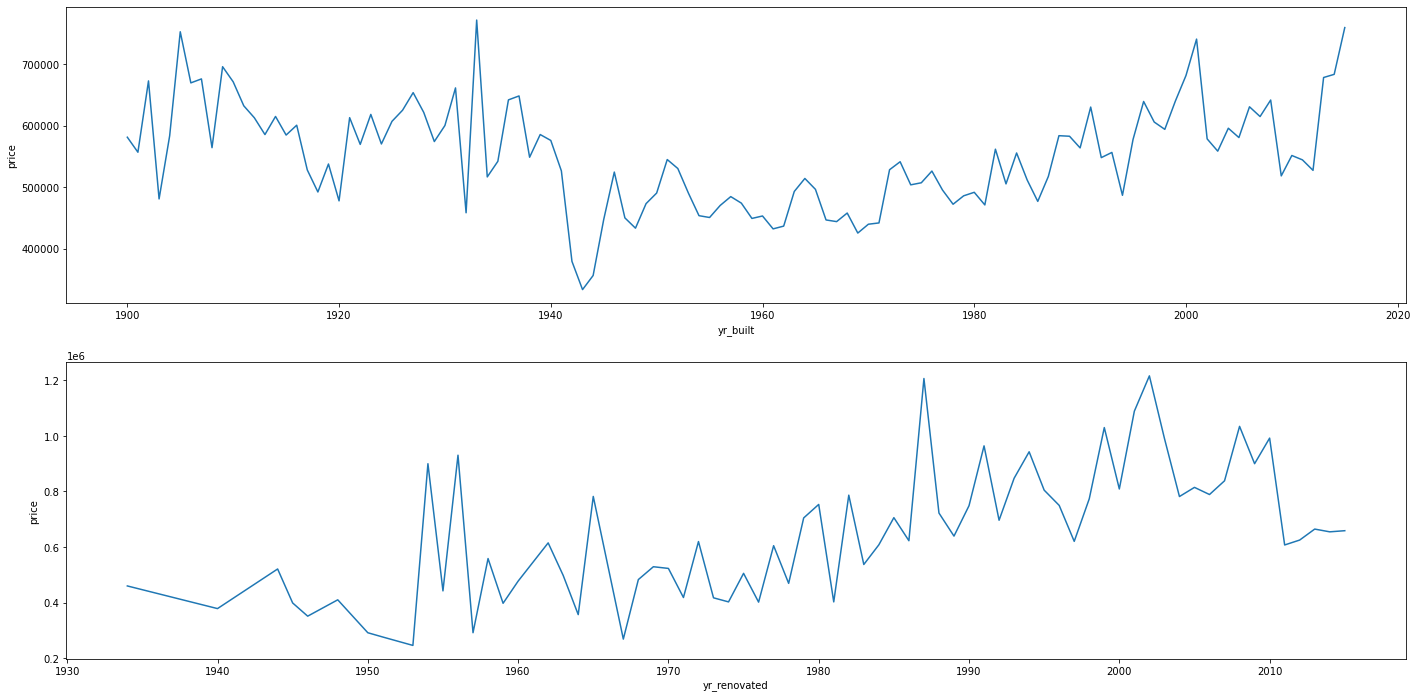

In [53]:
fig = plt.figure(figsize=(24,12))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[1,0])

#First Graph
df = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot(ax=ax1, y='price', x='yr_built', data = df)

#Second Graph
df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
sns.lineplot(ax=ax2, x='yr_renovated', y='price', data = df)

## 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 

In [32]:
import plotly.express as px

houses = data[['id', 'lat', 'long', 'price', 'sqft_living']].copy()

# define level of prices
houses['level'] = houses['price'].apply( lambda x: 0 if x <= 321950 else
                                                   1 if (x > 321950 ) & ( x <= 450000 ) else
                                                   2 if (x > 450000 ) & ( x <= 645000 ) else 3 )

# convert level to astype
houses['level'] = houses['level'].astype( int )

fig = px.scatter_mapbox(houses,
                 lat='lat',
                 lon='long',
                 size='sqft_living',
                 color_continuous_scale=px.colors.cyclical.IceFire,
                 size_max=15,
                 zoom=10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin={'r':0, '1':0, 't':0, 'b':0})
fig.show()

TypeError: 'int' object is not subscriptable

In [31]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,house
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,apartament
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,house
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,house
